In [169]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
rootFolder = "/home/giangtm/Work/Projects/DataScience/dataset/"
# print(check_output(["ls", rootFolder]).decode("utf8"))

In [170]:
d= pd.read_csv(rootFolder + "Project_Speed_Data.csv")
d.sort_values(['project_type', 'project_name'], ascending=[False, True], inplace=True)
d.head()

,project_id,project_name,project_type,form_name,step,real_speed,estimate_speed,different
5,59a7b1aefc13ae54a5000523,001_140102_Ancestry_42882_Texas,Type_Proof,Form_2,Classify,293.66,168.32,-74.47
6,59a7b1aefc13ae54a5000524,001_160108_Ancestry_45741_Lutheran_Bayern3,Type_Proof,Form_1,Classify,269.98,125.42,-115.26
8,59a7b1aefc13ae54a5000526,001_170106_Ancestry_47392_EN_UPDATE_RoyalNavy,Type_Proof,Form_1,Rework,204.88,106.97,-91.53
13,59a7b1aefc13ae54a500052b,002_130103_SAGA_504510,Type_Proof,Form_2,Classify,364.61,79.96,-355.99
14,59a7b1aefc13ae54a500052c,002_140102_Ancestry_41548_NARA,Type_Proof,Form_1,Capture,185.21,61.41,-201.60


In [171]:
d.describe()

,real_speed,estimate_speed,different
count,1000.000000,1000.000000,1000.000000
mean,212.322550,125.379410,-97.260100
std,105.375602,43.402355,136.520601
min,30.540000,50.050000,-661.730000
25%,122.757500,86.485000,-155.285000
50%,211.730000,126.825000,-68.050000
75%,303.102500,162.760000,3.560000
max,399.860000,199.790000,82.030000


In [172]:
is_greater_20 = d['different'] > 20
is_speed_greater_200 = d['real_speed'] > 100
analysis_data = d[is_greater_20 & is_speed_greater_200]
analysis_data[:10]

,project_id,project_name,project_type,form_name,step,real_speed,estimate_speed,different
101,59a7b1aefc13ae54a5000583,008_170120_Ancestry_46487_DE_Magdeburg_D,Type_Proof,Form_2,Classify,145.31,186.85,22.23
254,59a7b1affc13ae54a500061c,019_160202_Ancestry_46630_Berlin_BMD_Part5a,Type_Proof,Form_2,Rework,115.04,164.79,30.19
387,59a7b1affc13ae54a50006a1,029_160319_Ancestry_45739_Lutheran_Bayern,Type_Proof,Form_3,Classify,126.74,193.86,34.62
448,59a7b1affc13ae54a50006de,033_170512_Ancestry_47980_EN_Missouri_SB,Type_Proof,Form_1,Capture,102.15,188.01,45.67
490,59a7b1affc13ae54a5000708,036_170503_002_505296,Type_Proof,Form_1,Rework,104.29,183.34,43.12
510,59a7b1b0fc13ae54a500071c,038_120409_SAGA_503521,Type_Proof,Form_3,Classify,115.78,169.19,31.57
518,59a7b1b0fc13ae54a5000724,038_170612_Ancestry_47321_DE_B,Type_Proof,Form_1,Rework,135.31,184.99,26.86
708,59a7b1b0fc13ae54a50007e2,052_170713_Ancestry_47528_EN_A,Type_Proof,Form_2,Capture,139.15,190.81,27.07
729,59a7b1b0fc13ae54a50007f7,054_130724_Travel2Pay_HRS_Invoice_Training,Type_Proof,Form_2,Classify,123.04,160.39,23.29
791,59a7b1b1fc13ae54a5000835,058_140415_Ancestry_42395_DE,Type_Proof,Form_1,Capture,118.72,162.17,26.79


In [173]:
analysis_data.describe()

,real_speed,estimate_speed,different
count,38.000000,38.000000,38.000000
mean,119.341842,173.017368,30.675526
std,14.440047,18.143796,7.755529
min,100.060000,130.630000,20.410000
25%,104.005000,160.835000,23.417500
50%,119.380000,176.160000,29.955000
75%,128.360000,188.070000,34.672500
max,151.160000,196.180000,47.820000


In [174]:
byfighter = d.groupby(by="project_type")
print(byfighter)
avg_time = byfighter.mean();
print("AVG");
print(avg_time);

AVG
               real_speed  estimate_speed   different
project_type                                         
CustomProgram  215.995789      125.309934 -100.008947
Invoice        214.521250       93.058750 -159.093750
Library        191.057500      129.017500  -64.315000
Mailrespone    216.320090      123.058587 -105.973655
Management     137.010000      165.300000   17.110000
Other Model    199.295030      132.312303  -71.390788
Type_Proof     212.104196      125.851786  -95.991563


In [175]:
std = byfighter.std();
print("STD");
print(std);

STD
               real_speed  estimate_speed   different
project_type                                         
CustomProgram  106.832603       45.458325  139.415511
Invoice        109.233735       32.444125  172.238908
Library        124.648793       58.078169  143.485808
Mailrespone    105.124525       42.300331  140.715868
Management            NaN             NaN         NaN
Other Model     99.227936       42.113705  111.327053
Type_Proof     109.260237       44.664136  140.100418


In [176]:
byfighter.describe()

different                                                    \
                  count        mean         std     min       25%     50%   
project_type                                                                
CustomProgram     152.0 -100.008947  139.415511 -568.19 -153.4325 -57.330   
Invoice             8.0 -159.093750  172.238908 -460.50 -292.2600 -86.750   
Library             4.0  -64.315000  143.485808 -274.25  -97.2725  -8.935   
Mailrespone       446.0 -105.973655  140.715868 -624.03 -174.2500 -74.930   
Management          1.0   17.110000         NaN   17.11   17.1100  17.110   
Other Model       165.0  -71.390788  111.327053 -449.80 -125.0300 -51.350   
Type_Proof        224.0  -95.991563  140.100418 -661.73 -146.6100 -71.085   

                              estimate_speed               ...              \
                   75%    max          count        mean   ...         75%   
project_type                                               ...               
CustomProgram   5.3675  71.03          152.0  125.309934   ...    162.1925   
Invoice       -45.8375  43.42            8.0   93.058750   ...    104.7625   
Library        24.0225  34.86            4.0  129.017500   ...    166.1425   
Mailrespone    -6.2900  82.03          446.0  123.058587   ...    160.2175   
Management     17.1100  17.11            1.0  165.300000   ...    165.3000   
Other Model    17.3100  76.53          165.0  132.312303   ...    168.5500   
Type_Proof      4.0825  77.28          224.0  125.851786   ...    166.0350   

                      real_speed                                            \
                  max      count        mean         std     min       25%   
project_type                                                                 
CustomProgram  199.74      152.0  215.995789  106.832603   36.46  124.1150   
Invoice        155.19        8.0  214.521250  109.233735   55.96  153.6575   
Library        198.43        4.0  191.057500  124.648793   50.80  105.4525   
Mailrespone    199.71      446.0  216.320090  105.124525   30.61  123.9100   
Management     165.30        1.0  137.010000         NaN  137.01  137.0100   
Other Model    199.79      165.0  199.295030   99.227936   32.78  120.4000   
Type_Proof     199.15      224.0  212.104196  109.260237   30.54  122.8725   

                                         
                   50%      75%     max  
project_type                             
CustomProgram  218.410  302.275  399.31  
Invoice        200.235  297.420  362.73  
Library        199.025  284.630  315.38  
Mailrespone    216.075  307.830  399.31  
Management     137.010  137.010  137.01  
Other Model    190.140  278.180  399.86  
Type_Proof     199.395  313.585  398.88  

[7 rows x 24 columns]

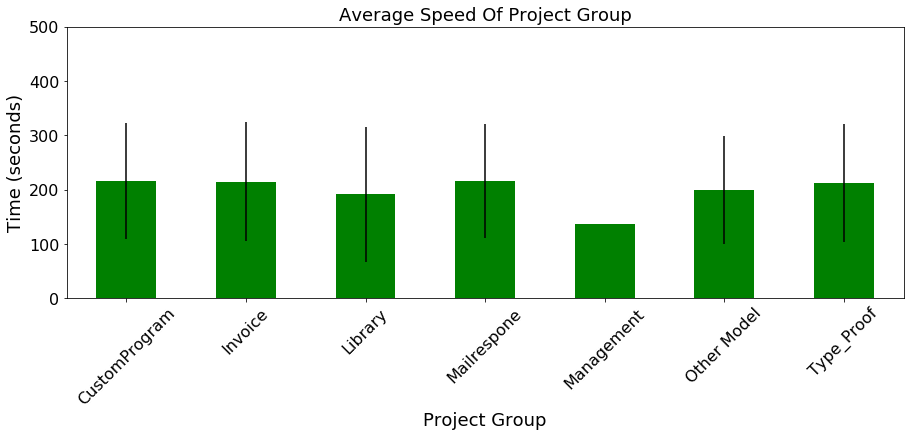

In [177]:
p = avg_time['real_speed'].plot(figsize=(15,5),legend=False,kind="bar",rot=45,color="green",fontsize=16,yerr=std);
p.set_title("Average Speed Of Project Group", fontsize=18);
p.set_xlabel("Project Group", fontsize=18);
p.set_ylabel("Time (seconds)", fontsize=18);
p.set_ylim(0,500);

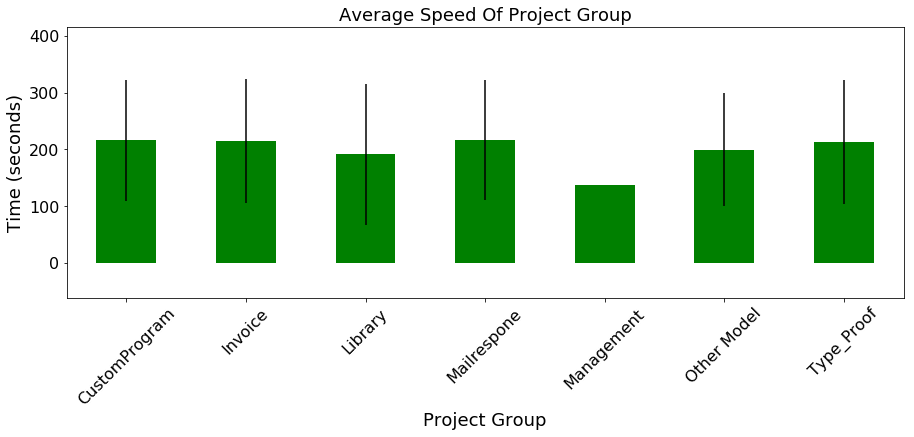

In [185]:
p = avg_time['real_speed'].plot(figsize=(15,5),legend=False,kind="bar",rot=45,color="green",fontsize=16,yerr=std);
p.set_title("Average Speed Of Project Group", fontsize=18);
p.set_xlabel("Project Group", fontsize=18);
p.set_ylabel("Time (seconds)", fontsize=18);


minVal = min(avg_time['real_speed'])
maxVal = max(avg_time['real_speed'])

p.set_ylim(minVal - 200,maxVal + 200);